In [6]:
import sys, ssl, urllib
import matplotlib.pyplot as plt

In [7]:
ssl._create_default_https_context = ssl._create_unverified_context

In [8]:
url = "https://ceiba.ntu.edu.tw/course/481ea4/hw1_data.csv"
# ref: http://www.gegugu.com/2016/12/28/23379.html
resp = urllib.request.urlopen(url)
resp_byte = resp.read()
dat_raw = resp_byte.decode("utf-8")
class_arr = ["Education Level", "Average Monthly Income","Working Environment"]
e_level = ["elementary school and below", "junior high", "senior high", "university", "graduate school and above"]
a_level = ["20000 and below", "20001-40000", "40001 and above"]
w_level = ["indoor", "outdoor", "unemployed"]
type_dict = dict({"l":"Line Chart", "b":"Bar Chart", "p":"Pie Chart"})

In [9]:
dat = dat_raw.split("\n")
myclass = dat[0].split(",")
arr = []
for i in [2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 14]:
    tmp = dat[i].split(",")
    tmp.pop(0)
    tmp2 = [float(i) for i in tmp]
    arr.append(tmp2)

In [10]:
def print_bar(mytype):

    n_groups = 5
    shift = 0
    
    if mytype == 0:
        n_groups = 5
        shift = 0
    elif mytype == 1:
        n_groups = 3
        shift = 5
    elif mytype == 2:
        n_groups = 3
        shift = 8

    d1 = []
    d2 = []
    for i in range(0, n_groups):
        d1.append(arr[i + shift][1])
        d2.append(arr[i + shift][3])
    d3 = []
    for i in range(n_groups):
        d3.append((arr[i][0] * arr[i][1] + arr[i][2] * arr[i][3]) / (arr[i][0] + arr[i][2]))

    # create plot
    fig, ax = plt.subplots()
    ind = []
    for i in range(0, n_groups):
        ind.append(i)
    bar_width = 0.15
    opacity = 0.8

    rects1 = plt.bar(ind, d1, bar_width,
                     alpha=opacity,
                     color='b',
                     label='Male')
    for i in range(0, n_groups):
        ind[i] += 0.2
    rects2 = plt.bar(ind, d2, bar_width,
                     alpha=opacity,
                     color='r',
                     label='Female')
    for i in range(0, n_groups):
        ind[i] += 0.2
    rects3 = plt.bar(ind, d3, bar_width,
                     alpha=opacity,
                     color='g',
                     label='Total')

    def autolabel(rects):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%.1f' % float(height),
                    ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    plt.xlabel(class_arr[mytype])
    plt.ylabel('Smoking Percentage (%)')
    plt.title('Smoking Percentage v.s. ' + class_arr[mytype])
    for i in range(0, n_groups):
        ind[i] -= 0.2
    if mytype == 0:
        plt.xticks(ind, (e_level[0],e_level[1],e_level[2],e_level[3],e_level[4]))
    elif mytype == 1:
        plt.xticks(ind, (a_level[0], a_level[1], a_level[2]))
    elif mytype == 2:
        plt.xticks(ind, (w_level[0], w_level[1], w_level[2]))
    plt.legend()

    plt.tight_layout()
    plt.show()

In [11]:
# print_bar(2)

In [12]:
def print_line(mytype):
    
    # Initialize figure and axes
    n_groups = 5
    shift = 0

    if mytype == 0:
        n_groups = 5
        shift = 0
    elif mytype == 1:
        n_groups = 3
        shift = 5
    elif mytype == 2:
        n_groups = 3
        shift = 8

    d1 = []
    d2 = []
    for i in range(0, n_groups):
        d1.append(arr[i + shift][1])
        d2.append(arr[i + shift][3])
    d3 = []
    for i in range(n_groups):
        d3.append((arr[i][0] * arr[i][1] + arr[i][2] * arr[i][3]) / (arr[i][0] + arr[i][2]))

    ind = []
    for i in range(0, n_groups):
        ind.append(i)

    fig, ax = plt.subplots()

    # Plot the data
    ax.plot(ind, d1, "-s", label="Male")
    for i in ind:
        ax.text(i, d1[i] + 1, '%.1f'%float(d1[i]), ha='center', va='bottom')
    ax.plot(ind, d2, "-s", label="Female")
    for i in ind:
        ax.text(i, d2[i] + 1, '%.1f'%float(d2[i]), ha='center', va='bottom')
    ax.plot(ind, d3, "-s", label="Total")
    for i in ind:
        ax.text(i, d3[i] + 1, '%.1f'%float(d3[i]), ha='center', va='bottom')

    plt.xlabel(class_arr[mytype])
    plt.ylabel('Smoking Percentage (%)')
    plt.title('Smoking Percentage v.s. ' + class_arr[mytype])
    plt.legend()
    # Set the custom ticks on the x-axis
    if mytype == 0:
        plt.xticks(ind, (e_level[0],e_level[1],e_level[2],e_level[3],e_level[4]))
    elif mytype == 1:
        plt.xticks(ind, (a_level[0], a_level[1], a_level[2]))
    elif mytype == 2:
        plt.xticks(ind, (w_level[0], w_level[1], w_level[2]))
        
    # Set the axis labels
    plt.show()

In [13]:
# print_line(2)

In [14]:
def print_pie(mytype):

    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = []

    # Initialize figure and axes
    n_groups = 5

    if mytype == 0:
        n_groups = 5
    elif mytype == 1:
        n_groups = 3
    elif mytype == 2:
        n_groups = 3
    dat = []
    for i in range(0, n_groups):
        dat.append(( arr[i][0]*arr[i][1] + arr[i][2]*arr[i][3]))
        if mytype == 0:
            labels.append(e_level[i])
        elif mytype == 1:
            labels.append(a_level[i])
        elif mytype == 2:
            labels.append(w_level[i])


    fig, ax = plt.subplots()
    ax.pie(dat, labels=labels, autopct='%1.1f%%',
            startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


    plt.suptitle("Proportion of different " + class_arr[mytype] + " in non-smoking popuplation")

    plt.show()

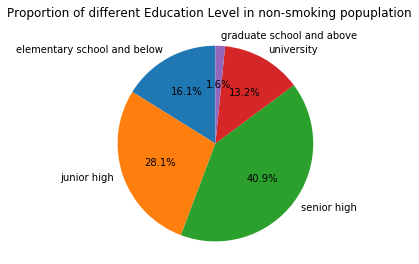

In [15]:
print_pie(0)